In [17]:
#required libraries.
import pandas as pd #data manipualtion and analysing (DataFrame)
import matplotlib.pyplot as plt  #Creating statc visualiztion 
import seaborn as sns  # improve static visulisation
import numpy as np #numeric operation
import plotly.express as px #interactive visualizations, like scatter plots, bar charts.


# sklearn's TfidfVectorizer converts text into TF-IDF features for text analysis.
# CountVectorizer converts text into a matrix of token counts.

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier  #(Multi-Layer Perceptron) is a neural network-based model used for classification.
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,GRU,LSTM,Bidirectional,SimpleRNN
from tensorflow.keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv("Phishing_Email.csv")

df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [20]:
df.isnull().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [21]:
print(df.columns)



Index(['Unnamed: 0', 'Email Text', 'Email Type'], dtype='object')


In [22]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.dropna(inplace=True,axis=0)
df.drop_duplicates(inplace=True)

In [11]:
#shape of data set
print("Dimension of the row data:",df.shape)

Dimension of the row data: (18634, 3)


In [24]:
# Create the bar chart
bar = px.bar(df['Email Type'].value_counts(), x=df['Email Type'].value_counts().index, y=df['Email Type'].value_counts().values,
             color=['green', 'red'], labels={'x': 'Category Safe Email and Phishing Email', 'y': 'Count of Emails'},
             title="Categorical Distribution")

# Show the plot
bar.show()

In [25]:
# Create the pie chart
fig_pie = px.pie(df['Email Type'].value_counts(), names=df['Email Type'].value_counts().index,
                 values=df['Email Type'].value_counts().values, title="Category Safe Email and Phishing Email")

# Show the pie chart
fig_pie.show()

Preprocessing

In [14]:
#encoding 
le = LabelEncoder()

df["Email Type"] = le.fit_transform(df["Email Type"])

In [15]:
df['Email Type'].value_counts()

Email Type
1    11322
0     7312
Name: count, dtype: int64

In [28]:
#Remove hyperlinks, punctuations, extra space
import re

def preprocess_txt(text):
    # Remove hyperlinks
    text = re.sub(r'http\S+', '', text)

    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Apply the preprocess_text function to the specified column in the DataFrame
df["Cleaned Text"] =df["Email Text"].apply(preprocess_txt)

In [29]:
df.head()

,Email Text,Email Type,Cleaned Text
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,re 6 1100 disc uniformitarianism re 1086 sex l...
1,the other side of * galicismos * * galicismo *...,Safe Email,the other side of galicismos galicismo is a sp...
2,re : equistar deal tickets are you still avail...,Safe Email,re equistar deal tickets are you still availab...
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,hello i am your hot lil horny toy i am the one...
4,software at incredibly low prices ( 86 % lower...,Phishing Email,software at incredibly low prices 86 lower dra...


In [30]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


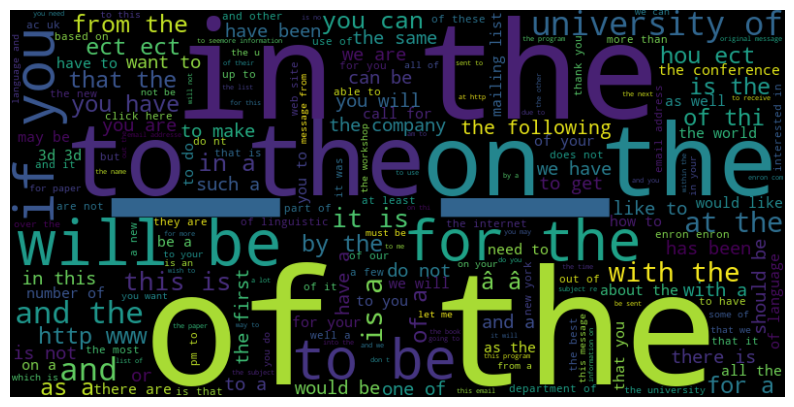

In [32]:
from wordcloud import WordCloud

#combine all rows into a single string
all_mails = " ".join(df['Cleaned Text'])

#create a wordcloud object
word_cloud = WordCloud(stopwords="english",width=800,height=400,background_color='black').generate(all_mails)

plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

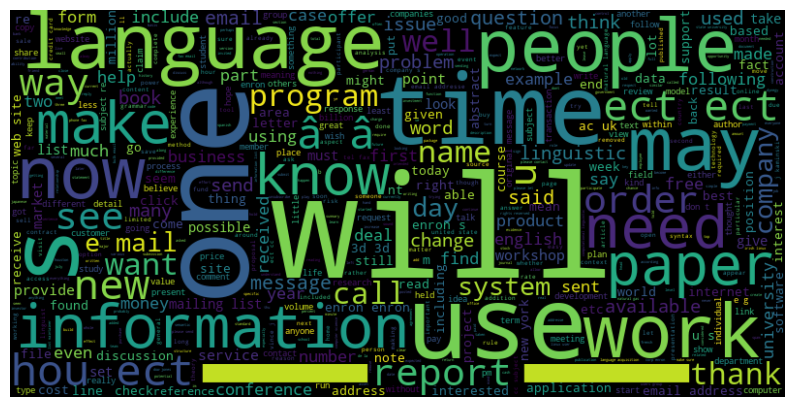

In [33]:
#combine all rows into a single string
all_mails = " ".join(df['Cleaned Text'])

#create a wordcloud object
word_cloud = WordCloud(width=800,height=400,background_color='black',max_words=10000).generate(all_mails)
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
#Converting text into vector
tf = TfidfVectorizer(stop_words="english",max_features=10000) #dimension reduction

feature_x = tf.fit_transform(df["Email Text"]).toarray()

In [36]:
# convert the label into numpy array
y_tf = np.array(df['Email Type'])